<a href="https://colab.research.google.com/github/JitendraAlim/Data-Science-Toolkit/blob/master/Python/Supervised%20Learning%20with%20scikit-learn/Supervised%20Learning%20with%20scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Supervised Learning with SciKit-Learn</center>

<center><img src="https://assets.datacamp.com/production/course_1939/shields/original/shield_image_course_1939_20200225-1-gfk9h7?1582649232" alt="Supervised Learning with SciKit Learn" width="250px"></center>

***
# Which of these is a Classification Problem?
Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to classification or regression. This exercise will help you develop your intuition for distinguishing between the two.

Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?

* Using labeled financial data to predict whether the value of a stock will go up or go down next week. (**Correct**)
* Using labeled housing price data to predict the price of a new house based on various features.
* Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
* Using labeled financial data to predict what the value of a stock will be next week.

In this example, there are two discrete, qualitative outcomes: the stock market going up, and the stock market going down. This can be represented using a binary variable, and is an application perfectly suited for classification.

***
# Numerical EDA
In this chapter, you'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

# Importing the US Congressional Voting Records (1984) data

In [ ]:
# Importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Importing the data
df = pd.read_csv("http://bit.ly/USVotingRecords")
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data. For a refresher on the importance of EDA, check out the first two chapters of Statistical Thinking in Python (Part 1).

Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called `df`. Use pandas' `.head()`, `.info()`, and `.describe()` methods in the IPython Shell to explore the DataFrame, and select the statement below that is **not** true.

* The DataFrame has a total of `435` rows and `17` columns.
* Except for `party`, all of the columns are of type `int64`.
* The first two rows of the DataFrame consist of votes made by Republicans and the next three rows consist of votes made by Democrats.
* There are 17 predictor variables, or features, in this DataFrame. (**Correct**)
* The target variable in this DataFrame is `'party'`.

The number of columns in the DataFrame is not equal to the number of features. One of the columns - `'party'` is the target variable.

***
# Visual EDA
The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the `scatter_matrix()` function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's `countplot`.

Given on below is a `countplot` of the `'education'` bill, generated from the following code:

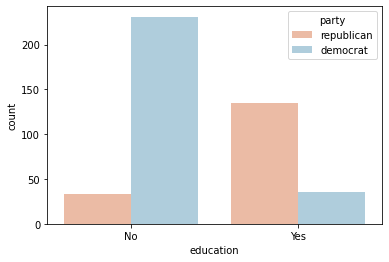

In [ ]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In `sns.countplot()`, we specify the x-axis data to be `'education'`, and hue to be `'party'`. Recall that `'party'` is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the `'education'` bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the `'satellite'` and `'missile'` bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with `plt.figure()` so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

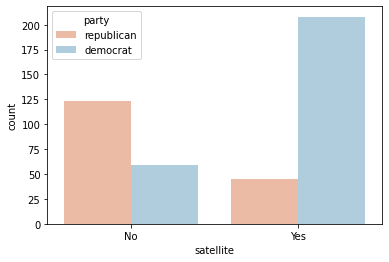

In [ ]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

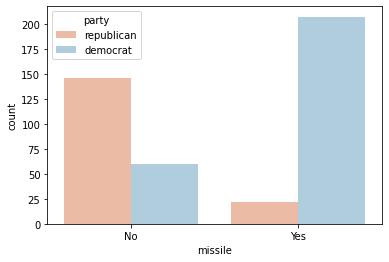

In [ ]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

**Possible Answers**

* 'satellite'
* 'missile'
* Both 'satellite' and 'missile' (Correct)
* Neither 'satellite' nor 'missile'

***
# k-Nearest Neighbors: Fit
Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame `df`.

In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array `X` and response variable `y`: This is in accordance with the common scikit-learn practice.

Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called `df`.

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Now that your k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

***
# k-Nearest Neighbors: Predict
Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the `.predict()` method on the `X` that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data `X` that the model has already seen. Using `.predict()` on `X_new` will generate 1 prediction, while using it on `X` will generate 435 predictions: 1 for each sample.

In [ ]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

X_new = np.array([[0.696469, 0.286139, 0.226851, 0.551315,
                  0.719469, 0.423106, 0.980764, 0.68483,
                  0.480932, 0.392118, 0.343178, 0.72905,
                  0.438572, 0.059678, 0.398044, 0.737995]])

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance?

***
# The Digits Recognition Dataset
Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these `Bunch` objects in two different ways: By using the `.` notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

In [ ]:
# Import necessary modules
from sklearn import datasets

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [ ]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


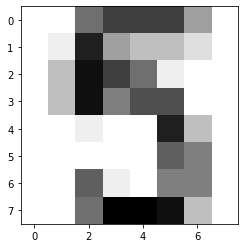

In [ ]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

It looks like the image in question corresponds to the digit '5'. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset?

***
# Train / Test Split + Fit / Predict / Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42,
                                                    stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

***
# Overfitting and Underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

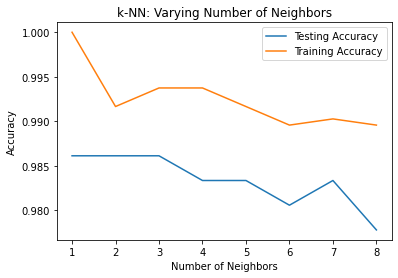

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

***
# Which of the following is a regression problem?
Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.

**Possible Answers**

* An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item.
* A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant.
* A restaurant using review data to ascribe positive or negative sentiment to a given review.
* A bike share company using time. (**Correct**)

The target variable here - the number of bike rentals at any given hour - is quantitative, so this is best framed as a regression problem.

***
# Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as `'gapminder.csv'`. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: `'fertility'`, which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's `.reshape()` method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [ ]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv')

# Create arrays for features and target variable
X = df['fertility'].values
y = df['life'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [ ]:
# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Notice the differences in shape before and after applying the `.reshape()` method. Getting the feature and target variable arrays into the right format for `scikit-learn` is an important precursor to model building.

***
# Exploring the Gapminder data
As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as `df` and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as `.info()`, `.describe()`, `.head()`.

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where `df.corr()` computes the pairwise correlation between columns:

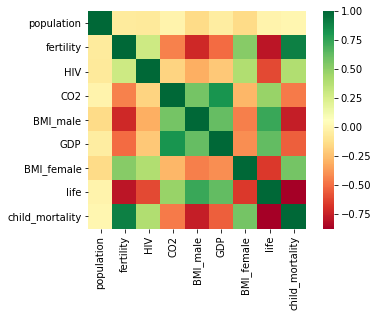

In [ ]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Once you have a feel for the data, consider the statements below and select the one that is **not** true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!

**Possible Answers**

* The DataFrame has 139 samples (or rows) and 9 columns.
* life and fertility are negatively correlated.
* The mean of life is 69.602878.
* fertility is of type int64. (**Correct**)
* GDP and life are positively correlated.

 As seen by using `df.info()`, `fertility`, along with all the other columns, is of type `float64`, not `int64`.

 ***
# Fit & Predict for Regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the `'RM'` feature of the Boston housing dataset. In this exercise, you will use the `'fertility'` feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is `'life'`. The array for the target variable has been pre-loaded as y and the array for `'fertility'` has been pre-loaded as `X_fertility`.

A scatter plot with `'fertility'` on the x-axis and `'life'` on the y-axis has been generated.

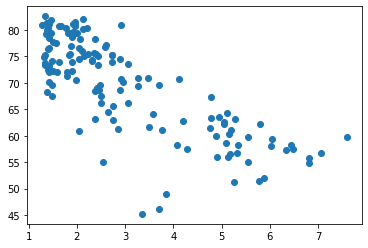

In [ ]:
plt.scatter(x=df['fertility'], y=df['life'])
plt.show()

As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the $R^2$ score using sckit-learn's `.score()` method.

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

X_fertility = df['fertility'].values.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility),
                               max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

0.6192442167740035


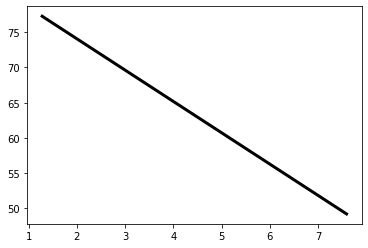

In [ ]:
# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!

***
# Train / Test Split for Regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over **all** features. In addition to computing the $R^2$ score, you will also compute the **Root Mean Squared Error (RMSE)**, which is another commonly used metric to evaluate regression models.

In [ ]:
# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df.drop(['life','Region'], axis=1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it?

